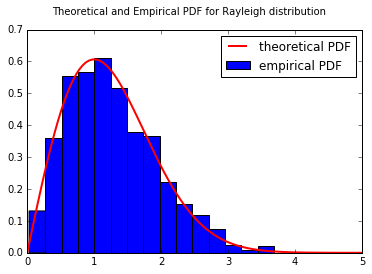

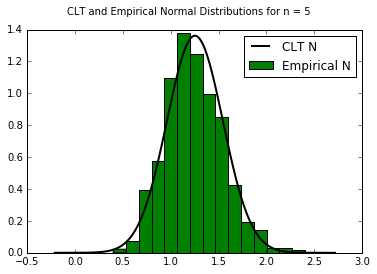

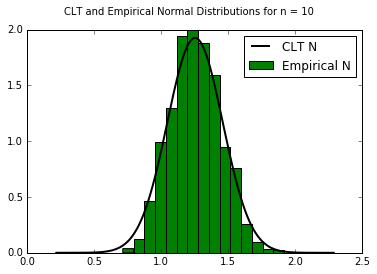

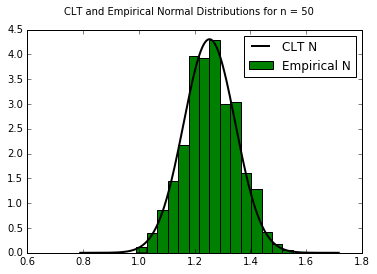

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from statsmodels.distributions.empirical_distribution import ECDF
%matplotlib inline

N = 1000

plt.figure()

# choosing rayleigh distribution 
rayleigh_rv = sts.rayleigh()

# plotting theoretical probability density function 
X = np.linspace(0,5,N)
pdf = rayleigh_rv.pdf(X)
line0, = plt.plot(X, pdf, linewidth=2, color='red', label='theoretical PDF');

# making sample from rayleigh distribution
sample = rayleigh_rv.rvs(N);

# plotting hist of empirical probability density function
plt.hist(sample, bins=15, normed=True, color='blue', label="empirical PDF");

# legends for plot and hist
legend = plt.legend(handles=[line0])
plt.legend();

# showing picture
plt.suptitle('Theoretical and Empirical PDF for Rayleigh distribution')
plt.show()

# external loop with n - number of points in sample
for n in [5,10,50]:  
    list_means = []
    # internal loop with sample_number
    for sample_number in range(1000):
        # making 'sample_number'-th sample
        s = rayleigh_rv.rvs(n);
        # appending list_means by another mean from 'sample_number'-th sample
        list_means.append(s.mean())

    # calculating Mean and Var for normal distribution according to CLT
    Mean = rayleigh_rv.mean()
    Var = np.sqrt(rayleigh_rv.var()) / np.sqrt(n)
    
    # making normal distribution
    norm_rv = sts.norm(Mean, Var)
    
    plt.figure()
    
    # plotting normal distribution
    left=Mean-5*Var
    right=Mean+5*Var
    x = np.linspace(left,right,N)
    norm_pdf = norm_rv.pdf(x)
    line0, = plt.plot(x, norm_pdf, color='black', linewidth=2, label='CLT N')
       
    
    # plotting hist for samples
    plt.hist(list_means, bins=15, color='green', normed=True, label='Empirical N');
    legend = plt.legend(handles=[line0])
    plt.legend();
    plt.suptitle('CLT and Empirical Normal Distributions for n = %s'%(n))
    plt.show()
    
# We can see accuracy increasing, which is proportional to sample length n. CLT is right.
